# #Question 1

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
def opendata(workfile):
    L=[]
    f=open(workfile, "r")
    for line in f:
        A= [x for x in line.split(",")]
        L.append(A)
    lenght=len(L[0])
    for i in range(1, len(L)):
        for j in range(1,lenght):
            L[i][j]=float(L[i][j])
    return L

In [3]:
workfile="C:/Users/hilai/tp/data.csv"

In [4]:
def adaptedList(L):
    A=[] 
    for i in range(1,len(L)):
        B=[j for j in L[i]]
        del B[0]
        A.append(B)
    
    return np.asarray(A)

In [5]:
def kmeans(L,k,ini='random',max_=1000,n_in=100):
    kmeans=KMeans(init=ini,n_clusters=k,max_iter=max_,n_init=n_in).fit(L)
    return kmeans.predict(L), kmeans.cluster_centers_

In [7]:
doc=opendata(workfile)
#print(doc)
#print(len(doc))
L=adaptedList(doc)
#print('newdoc',doc)
#print(len(L))

In [8]:
def SSE(L,k,ini='random',max_=1000,n_in=100):
    predict, center=kmeans(L,k,ini,max_,n_in)
    sum=0
    for i in range(k):
        for j in range(len(predict)):
            if predict[j]==i:
                for m in range(len(L[j])):
                    sum+=(L[j][m]-center[i][m])**2
    return sum
                    
    


In [9]:
SSE(L,8)

1598.2473569863535

In [10]:
#On peut changer l'initialisation et passer en kmeans++, puis faire varier la valeur de max_iter et de n-init

In [11]:
SSE(L,8,'k-means++')

1519.4039168404456

Comparer la qualité du cluster selon la valeur de n-init à max-iter fixé à 1000(qui varie de 1 à 10000 en passant par chaque décade): renvoie une liste avec la valeur du n_init et la valeur du SSE associé.

In [12]:
def takeVal(elem):
    return elem[1]

In [13]:

N_init=[]
N=[]
Val=[]
for j in range(4):
    for i in range(1,11):
        n=i*(10**j)
        val=SSE(L,8,n_in=n) 
        N.append(n)
        Val.append(val)
        N_init.append((n,val))
result=sorted(N_init,key=takeVal)

[(700, 1517.6434440517446), (4000, 1525.9198811186575), (9000, 1529.2057545282817), (5000, 1529.6233995637067), (3000, 1535.1352579200584), (10000, 1535.6607679404306), (7000, 1536.4432418707647), (8000, 1536.761023607476), (6000, 1543.9355259580163), (2000, 1547.6778945843705), (400, 1554.8510371047328), (800, 1554.9638139157632), (100, 1556.8111022286503), (900, 1559.4767684111737), (1000, 1564.0400729403643), (200, 1566.124589545047), (1000, 1569.5836629650494), (90, 1579.8828280451735), (500, 1580.0377313726362), (60, 1592.0794399496601), (100, 1599.564968221501), (600, 1600.88555628323), (20, 1605.4777582762426), (300, 1608.1692100426537), (4, 1612.5440666983166), (40, 1626.3574282040504), (70, 1639.5704735239342), (80, 1653.2882364718546), (50, 1658.6491925849218), (30, 1677.1878213060206), (5, 1719.9908966891219), (1, 1726.658907761968), (8, 1731.9402780589742), (10, 1751.0619739791273), (10, 1754.9607728351575), (9, 1755.258506933752), (7, 1787.2286309254114), (3, 1788.58881006

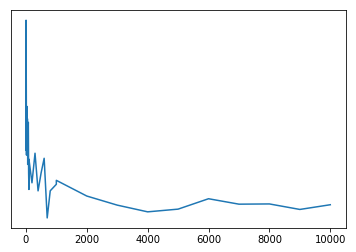

In [14]:
print(result)
plt.plot(N,Val)
plt.yscale('log')
plt.show()

Moralité: plus n_init est grand plus la SSE diminue ie le cluster est efficace, mais après 4000 pas d'amélioration notable ! 


Comparer la qualité du cluster selon la valeur de max-iter à n-init fixé(qui varie de 1 à 10000 en passant par chaque décade): renvoie une liste avec la valeur du n_init et la valeur du SSE associé.

In [15]:
Max_it=[]
Num=[]
Val2=[]
for j in range(4):
    for i in range(1,11):
        n=i*(10**j)
        val=SSE(L,8,max_=n) 
        Num.append(n)
        Val2.append(val)
        Max_it.append((n,val))
result2=sorted(Max_it,key=takeVal)

[(8, 1533.0886358126954), (100, 1533.453126725704), (20, 1542.1020732144889), (7000, 1550.5597722423888), (700, 1558.5796973339147), (30, 1570.6821834888726), (10, 1573.9500430586772), (5000, 1586.9201009125695), (200, 1587.4243100158344), (1000, 1592.0850272710268), (3000, 1593.8809411415436), (1, 1596.0658578839489), (900, 1598.7764470924053), (500, 1599.24856314666), (4, 1601.7270793833643), (600, 1605.7869826741164), (9000, 1606.489165747511), (1000, 1607.8094230294014), (6000, 1613.258264436114), (3, 1615.000260942125), (10000, 1617.287741330093), (400, 1618.6075292997277), (40, 1620.1262810418223), (300, 1622.1196252735288), (50, 1622.4500732703063), (6, 1622.6395818917435), (7, 1623.6493930319912), (5, 1625.5288307800913), (60, 1625.932868230614), (4000, 1629.4536867946294), (80, 1632.3927911249173), (10, 1639.859673546775), (90, 1645.9368184059658), (2, 1649.9869837178262), (8000, 1651.2073160259088), (70, 1652.6376069146393), (800, 1665.1425182414607), (9, 1671.6436768515243),

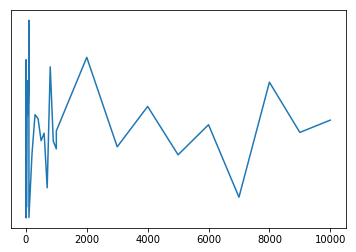

In [16]:
plt.close()
print(result2)
plt.plot(Num,Val2)
plt.yscale('log')
plt.show()

Moralité: max_iter a une influence relativement faible sur la qualité du clustering après un certain palier même si une tendance montre que l'augmentation de max_iter petmet de meilleur résultat. 6000 semble être une valeur adapté ! 

L'algorithme est lent à s'exécuter car beaucoup de valeur comparée. Prenons n_init=4000 et max_iter=6000

In [17]:
def clustering(doc,k=8,n_init=4000,max_iter=6000,ini='random'):
    #print('doc',doc)
    #print('lendoc',len(doc))
    cluster=[]
    L=adaptedList(doc)
    #print('lenL',len(L))
    #print('L',L)
    #print('doc',doc)
    predict,cluster_center=kmeans(L,k,ini,max_iter,n_init)
    #print('lenpredict',len(predict))
    for i in range(k):
        A=[]
        for j in range(len(predict)):
            if predict[j]==i:
                #print(doc[j+1][0])
                A.append(doc[j+1][0])
        cluster.append(A)
    return cluster

In [19]:
workfile="C:/Users/hilai/tp/data.csv"
doc=opendata(workfile)
cluster=clustering(doc)
#print(doc)
cluster

[['Kraft',
  'Procter & Gamble',
  'AT&T',
  'Merck',
  'McDonalds',
  'Coca-Cola',
  'Johnson & Johnson'],
 ['Verizon',
  'IBM',
  'The Home Depot',
  'Intel',
  'Wal-Mart',
  'General Electric',
  'United Technologies',
  'Travelers',
  '3M'],
 ['Chevron', 'Pfizer', 'ExxonMobil'],
 ['Cisco Systems'],
 ['American Express', 'Boeing', 'Microsoft', 'Walt Disney', 'JPMorgan Chase'],
 ['Bank of America'],
 ['Hewlett-Packard'],
 ['DuPont', 'Caterpillar', 'Alcoa']]